#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> MD. ABU SHAHAN<br>
<b>Reg. No:</b> 170103020017

### Assignment 6: CNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<b>2D convolution</b><br>
Kernel W shape: (hxw) <br>

$$y_{ij}=\sum_{k=0}^h \sum_{l=0}^w  X_{i+k,j+l}*w_{kl} $$ 


Output shape:<br>
Let, Input shape: X: (HxW) <br>
     Kernel shape: W: (hxw) <br>
     Output shape: y: (hhxww)<br>

output height would be, 
$$hh = \frac{H-h +2*pad}{stride}+1$$

Let, padding, pad=0 , filter size, hxw=(5x5), stride=1 and Input size: (28x28)<br>
So, $$hh = \frac{28-5+2*0}{1}+1=24$$
Similarly, 
$$ww = \frac{28-5+2*0}{1}+1=24$$

<b>Task 1: 2D convolution (hxwx1) </b> <br>
calculate output. <br>
Output should like below,<br><br>
[[ 100.   30.  -50.  -94.]<br>
 [ -50.  -50.  -10.  -85.]<br>
 [-230.   60.   30. -156.]<br>
 [-240.  140.  128. -189.]]

In [4]:
X=np.array([[10,10,20,0,0, 4], [0, 0,50,50,20, 0], [10,60,0,0,30, 2], [120,20,40,40,0, 1], [70, 0,10,80,90, 0], [40, 40,0,0,8,10]])
K=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(X)
print('kernel:')
print( K)

[[ 10  10  20   0   0   4]
 [  0   0  50  50  20   0]
 [ 10  60   0   0  30   2]
 [120  20  40  40   0   1]
 [ 70   0  10  80  90   0]
 [ 40  40   0   0   8  10]]
kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [5]:
def convolution(X,K,pad,stride):
    h=(1+(len(X[0])-len(K[0])+2*pad))/stride
    w=(1+(len(X[0])-len(K[0])+2*pad))/stride
    y=[]
    h=int(h)
    w=int(w)
    #print(h,w)
    for i in range(0,h,stride):
        A=[]
        for j in range(0,w,stride):
            s=-
            mul=np.multiply(s,K)
            z=np.sum(mul)
            A.append(z)
        y.append(A)
    return np.array(y)

In [6]:
#your code goes here.
pad,stride=0,1
y=convolution(X,K,pad,stride)
y

array([[ 100,   30,  -50,  -94],
       [ -50,  -50,  -10,  -85],
       [-230,   60,   30, -156],
       [-240,  140,  128, -189]])

<b>Task 2: ReLU</b><br>
$$y=max(0,x)$$

[[100.,  30.,   0.,   0.],<br>
[  0.,   0.,   0.,   0.],<br>
[  0.,  60.,  30.,   0.],<br>
[  0., 140., 128.,   0.]]

In [7]:
#your code goes here.
def relu(x):
    for i in range(0,len(x[0])):
        for j in range(0,len(x)):
            x[i][j]=max(0,x[i][j])
    return x



y1=relu(y)
y1

array([[100,  30,   0,   0],
       [  0,   0,   0,   0],
       [  0,  60,  30,   0],
       [  0, 140, 128,   0]])

<b>Task 3: MaxPooling</b><br>
Pool size=2, stride=2<br>
    
output should like below,<br>
[[100. -10.] <br>
 [140. 128.]] 

In [8]:
#your code goes here.

def max_pool(y,p,st):
    yy=[]
    for i in range(0,len(y),st):
        A=[]
        for j in range(0,len(y[0]),st):
            s=y[i:i+p,j:j+p].flatten() #2d->1d
            mx=max(s)
            A.append(mx)
        yy.append(A)
    return np.array(yy)

In [9]:
pool=2
stride=2
y2=max_pool(y,pool,stride) 
print(y2)

[[100   0]
 [140 128]]


<b>Task 4: Feature extraction (hxwx1)</b>
1. Load <b>lena.png</b> and plot the image.
2. apply convolution and plot the output (use the filter used above)
3. apply relu and plot the output
4. apply maxpool and plot the output.

<b>Import OpenCV python library</b><br>
Install if necessary. [Link](https://pypi.org/project/opencv-python/)

In [10]:
import cv2

In [12]:
org = cv2.imread('lena.png')
org= cv2.cvtColor(org, cv2.COLOR_BGR2RGB) #for matplotlib

In [13]:
print('rgb image shape: ',org.shape)

rgb image shape:  (220, 220, 3)


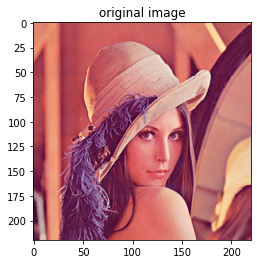

In [14]:
plt.imshow(org )
plt.title("original image")
plt.show()

In [15]:
X = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
X.shape

(220, 220)

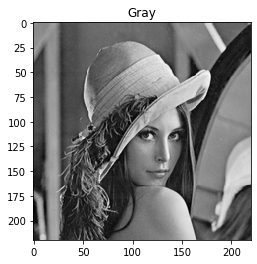

In [16]:
plt.imshow(X, cmap='gray')
plt.title("Gray")
plt.show()

In [17]:
filter=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(filter)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [18]:
#apply convolution
def convolution(X,K,pad,stride):
    h=(1+(len(X[0])-len(K[0])+2*pad))/stride
    w=(1+(len(X[0])-len(K[0])+2*pad))/stride
    y=[]
    h=int(h)
    w=int(w)
    #print(h,w)
    for i in range(0,h,stride):
        A=[]
        for j in range(0,w,stride):
            s=X[i:i+len(K),j:j+len(K[0])]
            mul=np.multiply(s,K)
            z=np.sum(mul)
            A.append(z)
        y.append(A)
    return np.array(y)

y_1 = convolution(X,filter,0,1)
y_1

array([[ -16,    2,    3, ...,  166,  123, -108],
       [ -10,    1,    2, ...,   35,  -14, -133],
       [  -2,   -1,    5, ..., -125, -118,  -88],
       ...,
       [   5,   11,   33, ...,   -4,   31,   63],
       [   5,   16,   21, ...,   38,   65,   58],
       [   7,   15,   14, ...,   76,   71,   32]])

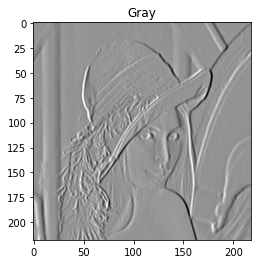

In [20]:
#plot
plt.imshow(y_1, cmap='gray')
plt.title("Gray")
plt.show()

In [21]:
#apply relu
def relu(x):
    for i in range(0,len(x[0])):
        for j in range(0,len(x)):
            x[i][j]=max(0,x[i][j])
    return x



y_relu=relu(y_1)
y_relu

array([[  0,   2,   3, ..., 166, 123,   0],
       [  0,   1,   2, ...,  35,   0,   0],
       [  0,   0,   5, ...,   0,   0,   0],
       ...,
       [  5,  11,  33, ...,   0,  31,  63],
       [  5,  16,  21, ...,  38,  65,  58],
       [  7,  15,  14, ...,  76,  71,  32]])

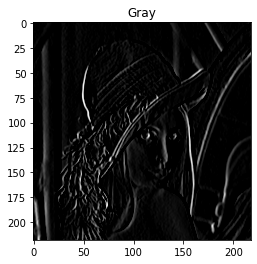

In [22]:
#plot
plt.imshow(y_relu, cmap='gray')
plt.title("relu")
plt.show()

In [23]:
#apply maxpool
def max_pool(y,p,st):
    yy=[]
    for i in range(0,len(y),st):
        A=[]
        for j in range(0,len(y[0]),st):
            s=y[i:i+p,j:j+p].flatten() #2d->1d
            mx=max(s)
            A.append(mx)
        yy.append(A)
    return np.array(yy)

pool=2
stride=2
y_maxpool=max_pool(y_relu,pool,stride) 
print(y_maxpool)

[[  2   3   1 ...  15 166 123]
 [  0   8   0 ...   0   0   0]
 [  0   5   3 ...   0   0  17]
 ...
 [ 61  85 318 ...   0   0   0]
 [ 12  46 439 ...  22   4  63]
 [ 16  27 489 ...  43  76  71]]


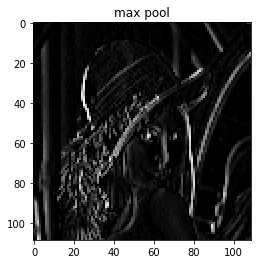

In [25]:
#plot
plt.imshow(y_maxpool, cmap='gray')
plt.title("max pool")
plt.show()

<b>Task 5: Convolution on Image. Multi channel</b>
1. Apply convolution
2. Plot the 8 images

In [52]:
X=org.copy()
print('input image shape:',X.shape)

input image shape: (220, 220, 3)


In [53]:
n_C=8            #number of filters
n_C_prev=3       #number of channels in the input
f=5              #filter size
W=np.random.randn(n_C, f, f, n_C_prev)/9.0
print('filters shape:',W.shape)

filters shape: (8, 5, 5, 3)


In [54]:
print('output shape should be: 216x216x8')

output shape should be: 216x216x8


In [55]:
#Task apply convolution, draw the 8 outputs seperately. 
x=X.transpose()

In [56]:
def convolution_multi(X,K,pad,stride):
    h=(1+(len(X[0][0])-len(K[0][0])+2*pad))/stride
    w=(1+(len(X[0][0])-len(K[0][0])+2*pad))/stride
    y=[]
    h=int(h)
    w=int(w)
    #print(h,w)
    for i in range(0,h,stride):
        A=[]
        for j in range(0,w,stride):
            s=X[0:0+len(K),i:i+len(K[0]),j:j+len(K[0][0])]
            mul=np.multiply(s,K)
            z=np.sum(mul)
            A.append(z)
        y.append(A)
    return np.array(y)

In [57]:
img=[]
pad=0
stride=1
for i in range(0,n_C):
    a=W[i].transpose()
    r=convolution_multi(x,a,pad,stride)
    img.append(r.transpose())
    

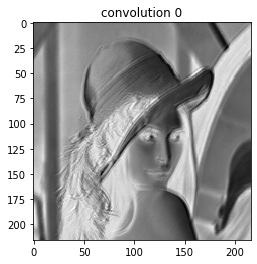

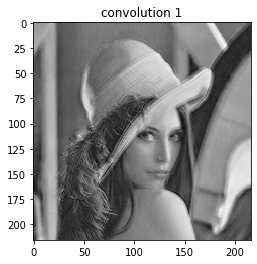

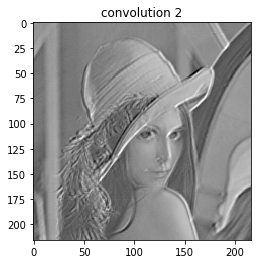

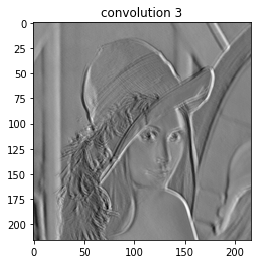

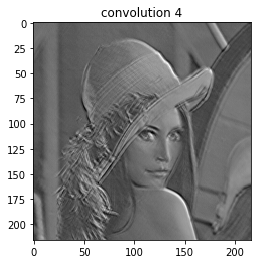

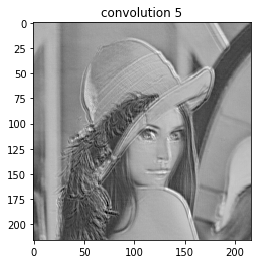

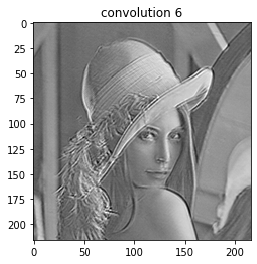

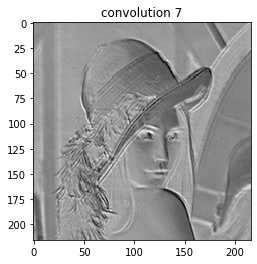

In [58]:
for i in range(0,len(img)):
    plt.imshow(img[i], cmap='gray')
    plt.title("convolution "+str(i))
    plt.show()

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>MD. ABU SHAHAN</u> bearing registration no. <u>170103020017</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>MD. ABU SHAHAN</u><br>
Date: <u>11/09/19</u>

_your__writing_